C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8772 - loss: 0.4263 - val_accuracy: 0.9578 - val_loss: 0.1328
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9683 - loss: 0.1026 - val_accuracy: 0.9713 - val_loss: 0.0936
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9786 - loss: 0.0685 - val_accuracy: 0.9750 - val_loss: 0.0768
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9838 - loss: 0.0496 - val_accuracy: 0.9754 - val_loss: 0.0775
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9884 - loss: 0.0379 - val_accuracy: 0.9768 - val_loss: 0.0768
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9900 - loss: 0.0295 - val_accuracy: 0.9783 - val_loss: 0.0766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9751 - val_loss: 0.0932
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9938 - loss:

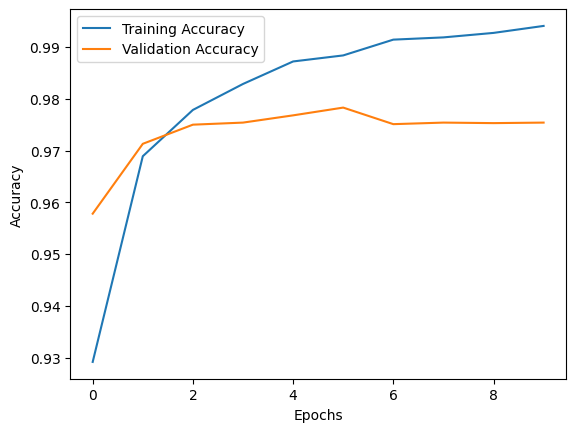

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9712 - loss: 0.1194
Test Accuracy: 97.54%


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0

# Define and compile the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")